In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

# Reading Files

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train['source'] = 'train'
test['source'] = 'test'
#data = pd.concat([train,test], ignore_index=True)
#print(train.shape,test.shape,data.shape)

In [3]:
#data = pd.merge(train,test) (891, 13) (418, 12) (0, 13)                            
data = pd.concat([train,test], ignore_index=True,sort = False)
print(train.shape,test.shape,data.shape)

(891, 13) (418, 12) (1309, 13)


In [4]:

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [5]:
print("Number of Passenger in Data "+str(len(data)))

Number of Passenger in Data 1309


# Analyzing the Data

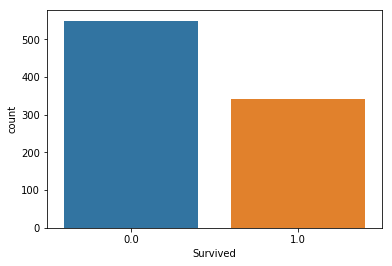

In [6]:
sns.countplot(x = 'Survived', data = data)

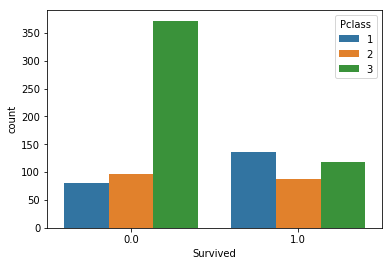

In [7]:
sns.countplot(x = "Survived",hue = "Pclass", data = data)

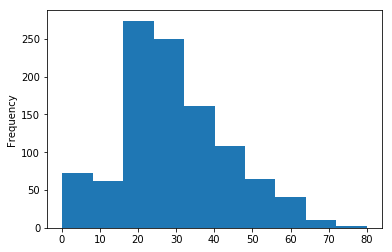

In [8]:
data["Age"].plot.hist()

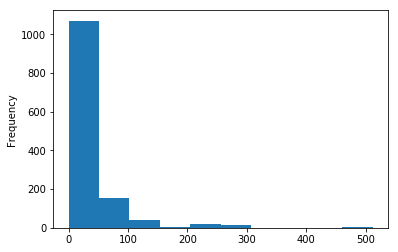

In [9]:
data["Fare"].plot.hist()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
source         1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 133.0+ KB


In [11]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [12]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
source            0
dtype: int64

In [13]:
data.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
source          object
dtype: object

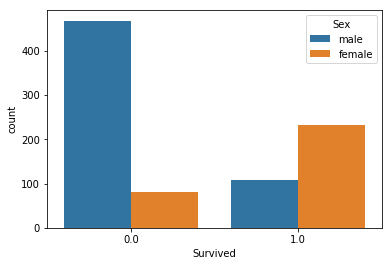

In [14]:
sns.countplot(x="Survived", hue = "Sex", data= data)

In [15]:
data.drop( "Cabin",axis=1,inplace=True)

In [16]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,source
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,train


In [17]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
data.drop(["Name","Ticket"], axis = 1, inplace = True)

In [18]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,source
0,1,0.0,3,male,22.0,1,0,7.2500,S,train
1,2,1.0,1,female,38.0,1,0,71.2833,C,train
2,3,1.0,3,female,26.0,0,0,7.9250,S,train
3,4,1.0,1,female,35.0,1,0,53.1000,S,train
4,5,0.0,3,male,35.0,0,0,8.0500,S,train


In [19]:
# One Hot Encoding
pd.get_dummies(data['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [20]:
# One Hot Encoding
sex = pd.get_dummies(data['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [21]:
# One hot Encoding
embark = pd.get_dummies(data['Embarked'], drop_first = True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [22]:
Pcl = pd.get_dummies(data['Pclass'], drop_first = True)
Pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [23]:
data = pd.concat([data,sex,embark,Pcl], axis=1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,source,male,Q,S,2,3
0,1,0.0,3,male,22.0,1,0,7.2500,S,train,1,0,1,0,1
1,2,1.0,1,female,38.0,1,0,71.2833,C,train,0,0,0,0,0
2,3,1.0,3,female,26.0,0,0,7.9250,S,train,0,0,1,0,1
3,4,1.0,1,female,35.0,1,0,53.1000,S,train,0,0,1,0,0
4,5,0.0,3,male,35.0,0,0,8.0500,S,train,1,0,1,0,1


In [24]:
data.drop(["Sex","Embarked","Pclass","Age"], axis=1, inplace = True)
data.head()

,PassengerId,Survived,SibSp,Parch,Fare,source,male,Q,S,2,3
0,1,0.0,1,0,7.2500,train,1,0,1,0,1
1,2,1.0,1,0,71.2833,train,0,0,0,0,0
2,3,1.0,0,0,7.9250,train,0,0,1,0,1
3,4,1.0,1,0,53.1000,train,0,0,1,0,0
4,5,0.0,0,0,8.0500,train,1,0,1,0,1


In [25]:
# Divide into test and train: 
#train = data.loc[data['source'] == "train"]
#test  = data.loc[data["source"]== "test"]

# Drop Unnescessary Column:
#train.drop(['source'], axis = 1, inplace = True)
#test.drop(['source'], axis = 1, inplace=True)

# Export the files as a modified Version
#train.to_csv("train_modified.csv", index = False)
#test.to_csv("test_modified.csv", index = False)


In [26]:
data['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)
data.head()

,PassengerId,Survived,SibSp,Parch,Fare,source,male,Q,S,2,3
0,1,0.0,1,0,7.2500,train,1,0,1,0,1
1,2,1.0,1,0,71.2833,train,0,0,0,0,0
2,3,1.0,0,0,7.9250,train,0,0,1,0,1
3,4,1.0,1,0,53.1000,train,0,0,1,0,0
4,5,0.0,0,0,8.0500,train,1,0,1,0,1


In [27]:
data.isnull().sum()

PassengerId      0
Survived       418
SibSp            0
Parch            0
Fare             0
source           0
male             0
Q                0
S                0
2                0
3                0
dtype: int64

In [28]:
# Divide into test and train: 
train = data.loc[data['source'] == "train"]
test  = data.loc[data["source"]== "test"]

# Drop Unnescessary Column:
train.drop(['source'], axis = 1, inplace = True)
test.drop(['source'], axis = 1, inplace=True)

# Export the files as a modified Version
train.to_csv("train_modified.csv", index = False)
test.to_csv("test_modified.csv", index = False)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [29]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test = test.drop("Survived", axis = 1).copy()

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
#X_test.isnull().sum()
predictions = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train)*100,2)
acc_log

80.02

In [32]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predictions
    })
submission.to_csv("Lgender_submission.csv", index = False)

In [33]:
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Support Vector Machine

In [34]:
svc = SVC()
svc.fit(X_train,Y_train)
SVC_Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

96.18

In [35]:
submission = pd.DataFrame({"PassengerId":test["PassengerId"],
                            "Survived":SVC_Y_pred})
submission.to_csv("SVC_gender_submission.csv", index = False)

# Linear SVC

In [36]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Linear_SVC_Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc


72.84

In [37]:
submission = pd.DataFrame({"PassengerId":test["PassengerId"],
                            "Survived":Linear_SVC_Y_pred})
submission.to_csv("Linear_SVC_gender_submission.csv", index = False)

# Stochastic Gradient Descent

In [38]:
#sgd = SGDClassifier()
sgd = SGDClassifier(alpha=0.0020)
sgd.fit(X_train, Y_train)
Gradient_Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


62.18

In [39]:
submission = pd.DataFrame({"PassengerId":test["PassengerId"],"Survived":Gradient_Y_pred})
submission.to_csv("Gradient_gender_submission.csv", index = False)

# KNN

In [40]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,Y_train)
knn_Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

79.91

In [41]:
submission = pd.DataFrame({"PassengerId":test["PassengerId"],"Survived":knn_Y_pred})
submission.to_csv("knn_gender_submission.csv", index = False)

In [42]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Gaussian_Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.01

In [43]:
submission = pd.DataFrame({"PassengerId":test["PassengerId"],"Survived":Gaussian_Y_pred})
submission.to_csv("Gaussian_gender_submission.csv", index = False)

# Decission Tree

In [44]:
decision_tree = DecisionTreeClassifier(max_depth = 15,min_samples_leaf = 3)
decision_tree.fit(X_train, Y_train)
Decission_Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

90.68

In [45]:
submission = pd.DataFrame({"PassengerId":test["PassengerId"],"Survived":Decission_Y_pred})
submission.to_csv("Decission_gender_submission.csv", index = False)

# Random Forest

In [46]:
random_forest = RandomForestClassifier(n_estimators=10,n_jobs = 4)
random_forest.fit(X_train, Y_train)
Random_Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.32

In [47]:
submission = pd.DataFrame({"PassengerId":test["PassengerId"],"Survived":Random_Y_pred})
submission.to_csv("Random_Forest_gender_submission.csv", index = False)

In [48]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',  
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.32
0,Support Vector Machines,96.18
7,Decision Tree,90.68
2,Logistic Regression,80.02
1,KNN,79.91
4,Naive Bayes,79.01
6,Linear SVC,72.84
5,Stochastic Gradient Decent,62.18
